# Sommaire

# Import des librairies

In [3]:
import sys
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Vérification des numéros de version des librairies

In [5]:
print('Version des librairies utilisées :')
print('Python        : ' + sys.version)
print('NumPy         : ' + np.version.full_version)
print('Pandas        : ' + pd.__version__)
print('MissingNO     : ' + msno.__version__)
print('Matplotlib    : ' + mpl.__version__)
print('Seaborn       : ' + sns.__version__)

Version des librairies utilisées :
Python        : 3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:12:24) [GCC 11.2.0]
NumPy         : 1.26.4
Pandas        : 2.2.2
MissingNO     : 0.5.2
Matplotlib    : 3.8.4
Seaborn       : 0.13.2


# Etape 1 : Menez une analyse générale des données


## Import des datasets

### EdStatsCountry

In [9]:
country_df = pd.read_csv("./Datasets/EdStatsCountry.csv")

### EdStatsCountry-Series

In [11]:
country_series_df = pd.read_csv("./Datasets/EdStatsCountry-Series.csv")

### EdStatsData

In [13]:
data_df = pd.read_csv("./Datasets/EdStatsData.csv")

### EdStatsFootNote

In [15]:
footnote_df = pd.read_csv("./Datasets/EdStatsFootNote.csv")

### EdStatsSeries

In [17]:
series_df = pd.read_csv("./Datasets/EdStatsSeries.csv")

## Analyse du dataset EdStatsCountry

### Affichons les premières lignes du dataset

In [20]:
country_df.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


### Analyse de la forme du dataset, nombre de lignes et de colonnes

In [22]:
nombre_lignes = country_df.shape[0]
print(f"Il y a {nombre_lignes} lignes dans ce dataset")
nombre_colonnes = country_df.shape[1]
print(f"Il y a {nombre_colonnes} colonnes dans ce dataset")

Il y a 241 lignes dans ce dataset
Il y a 32 colonnes dans ce dataset


### Affiche des informations générales sur le dataset

In [24]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

### Analyse du type des données présentes dans le dataset

In [26]:
country_df.dtypes

Country Code                                          object
Short Name                                            object
Table Name                                            object
Long Name                                             object
2-alpha code                                          object
Currency Unit                                         object
Special Notes                                         object
Region                                                object
Income Group                                          object
WB-2 code                                             object
National accounts base year                           object
National accounts reference year                     float64
SNA price valuation                                   object
Lending category                                      object
Other groups                                          object
System of National Accounts                           object
Alternative conversion f

### Vérifions si des valeurs sont manquantes dans le dataset

In [28]:
country_df.isnull().sum()

Country Code                                           0
Short Name                                             0
Table Name                                             0
Long Name                                              0
2-alpha code                                           3
Currency Unit                                         26
Special Notes                                         96
Region                                                27
Income Group                                          27
WB-2 code                                              1
National accounts base year                           36
National accounts reference year                     209
SNA price valuation                                   44
Lending category                                      97
Other groups                                         183
System of National Accounts                           26
Alternative conversion factor                        194
PPP survey year                

In [29]:
somme_nan = country_df.isnull().sum().sum()
print(f"Il y a {somme_nan} valeurs manquantes dans le dataset")

Il y a 2354 valeurs manquantes dans le dataset


### Vérifions si des valeurs sont dupliquées dans le dataset

In [31]:
country_df_duplicate = country_df[country_df.duplicated("Country Code")]
print(f"Il y a {country_df_duplicate.shape[0]} valeurs dupliquées dans ce dataset")

Il y a 0 valeurs dupliquées dans ce dataset


### Conclusion

- Ce dataset présente les différents pays contenus dans l'étude.
- Le jeu de données contient 241 lignes et 32 colonnes.
- Nous pouvons constater qu'il manque 2354 valeurs sur l'ensemble du dataset.
- Il ne semble pas y avoir de doublons de pays.

Notes :
- Les informations concernant la "region" et "l'income group" peuvent être pertinentes pour le reste de l'analyse.
- La colonne "Unnamed: 31" est complètement vide et pourra être supprimée.

## Analyse du dataset EdStatsCountry-Series

### Affichons les premières lignes du dataset

In [35]:
country_series_df.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


### Analyse de la forme du dataset, nombre de lignes et de colonnes

In [37]:
nombre_lignes = country_series_df.shape[0]
print(f"Il y a {nombre_lignes} lignes dans ce dataset")
nombre_colonnes = country_series_df.shape[1]
print(f"Il y a {nombre_colonnes} colonnes dans ce dataset")

Il y a 613 lignes dans ce dataset
Il y a 4 colonnes dans ce dataset


### Affiche des informations générales sur le dataset

In [39]:
country_series_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


### Analyse du type des données présentes dans le dataset

In [41]:
country_series_df.dtypes

CountryCode     object
SeriesCode      object
DESCRIPTION     object
Unnamed: 3     float64
dtype: object

### Vérifions si des valeurs sont manquantes dans le dataset

In [43]:
country_series_df.isnull().sum()

CountryCode      0
SeriesCode       0
DESCRIPTION      0
Unnamed: 3     613
dtype: int64

### Vérifions si des valeurs sont dupliquées dans le dataset

In [45]:
country_series_df_duplicate = country_series_df[country_series_df.duplicated()]
print(f"Il y a {country_series_df_duplicate.shape[0]} valeurs dupliquées dans ce dataset")

Il y a 0 valeurs dupliquées dans ce dataset


### Conclusion

- Ce dataset présente les sources des indicateurs par pays.
- Le jeu de données contient 613 lignes et 4 colonnes.
- Il ne semble pas y avoir de doublons.

Notes :
- La colonne "Unnamed: 3" est complètement vide et pourra être supprimée

## Analyse du dataset EdStatsData

### Affichons les premières lignes du dataset

In [49]:
data_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Analyse de la forme du dataset, nombre de lignes et de colonnes

In [51]:
nombre_lignes = data_df.shape[0]
print(f"Il y a {nombre_lignes} lignes dans ce dataset")
nombre_colonnes = data_df.shape[1]
print(f"Il y a {nombre_colonnes} colonnes dans ce dataset")

Il y a 886930 lignes dans ce dataset
Il y a 70 colonnes dans ce dataset


### Affiche des informations générales sur le dataset

In [53]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

### Analyse du type des données présentes dans le dataset

In [55]:
data_df.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1970              float64
                   ...   
2085              float64
2090              float64
2095              float64
2100              float64
Unnamed: 69       float64
Length: 70, dtype: object

### Vérifions si des valeurs sont manquantes dans le dataset

In [57]:
data_df.isnull().sum()

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1970              814642
                   ...  
2085              835494
2090              835494
2095              835494
2100              835494
Unnamed: 69       886930
Length: 70, dtype: int64

<Axes: >

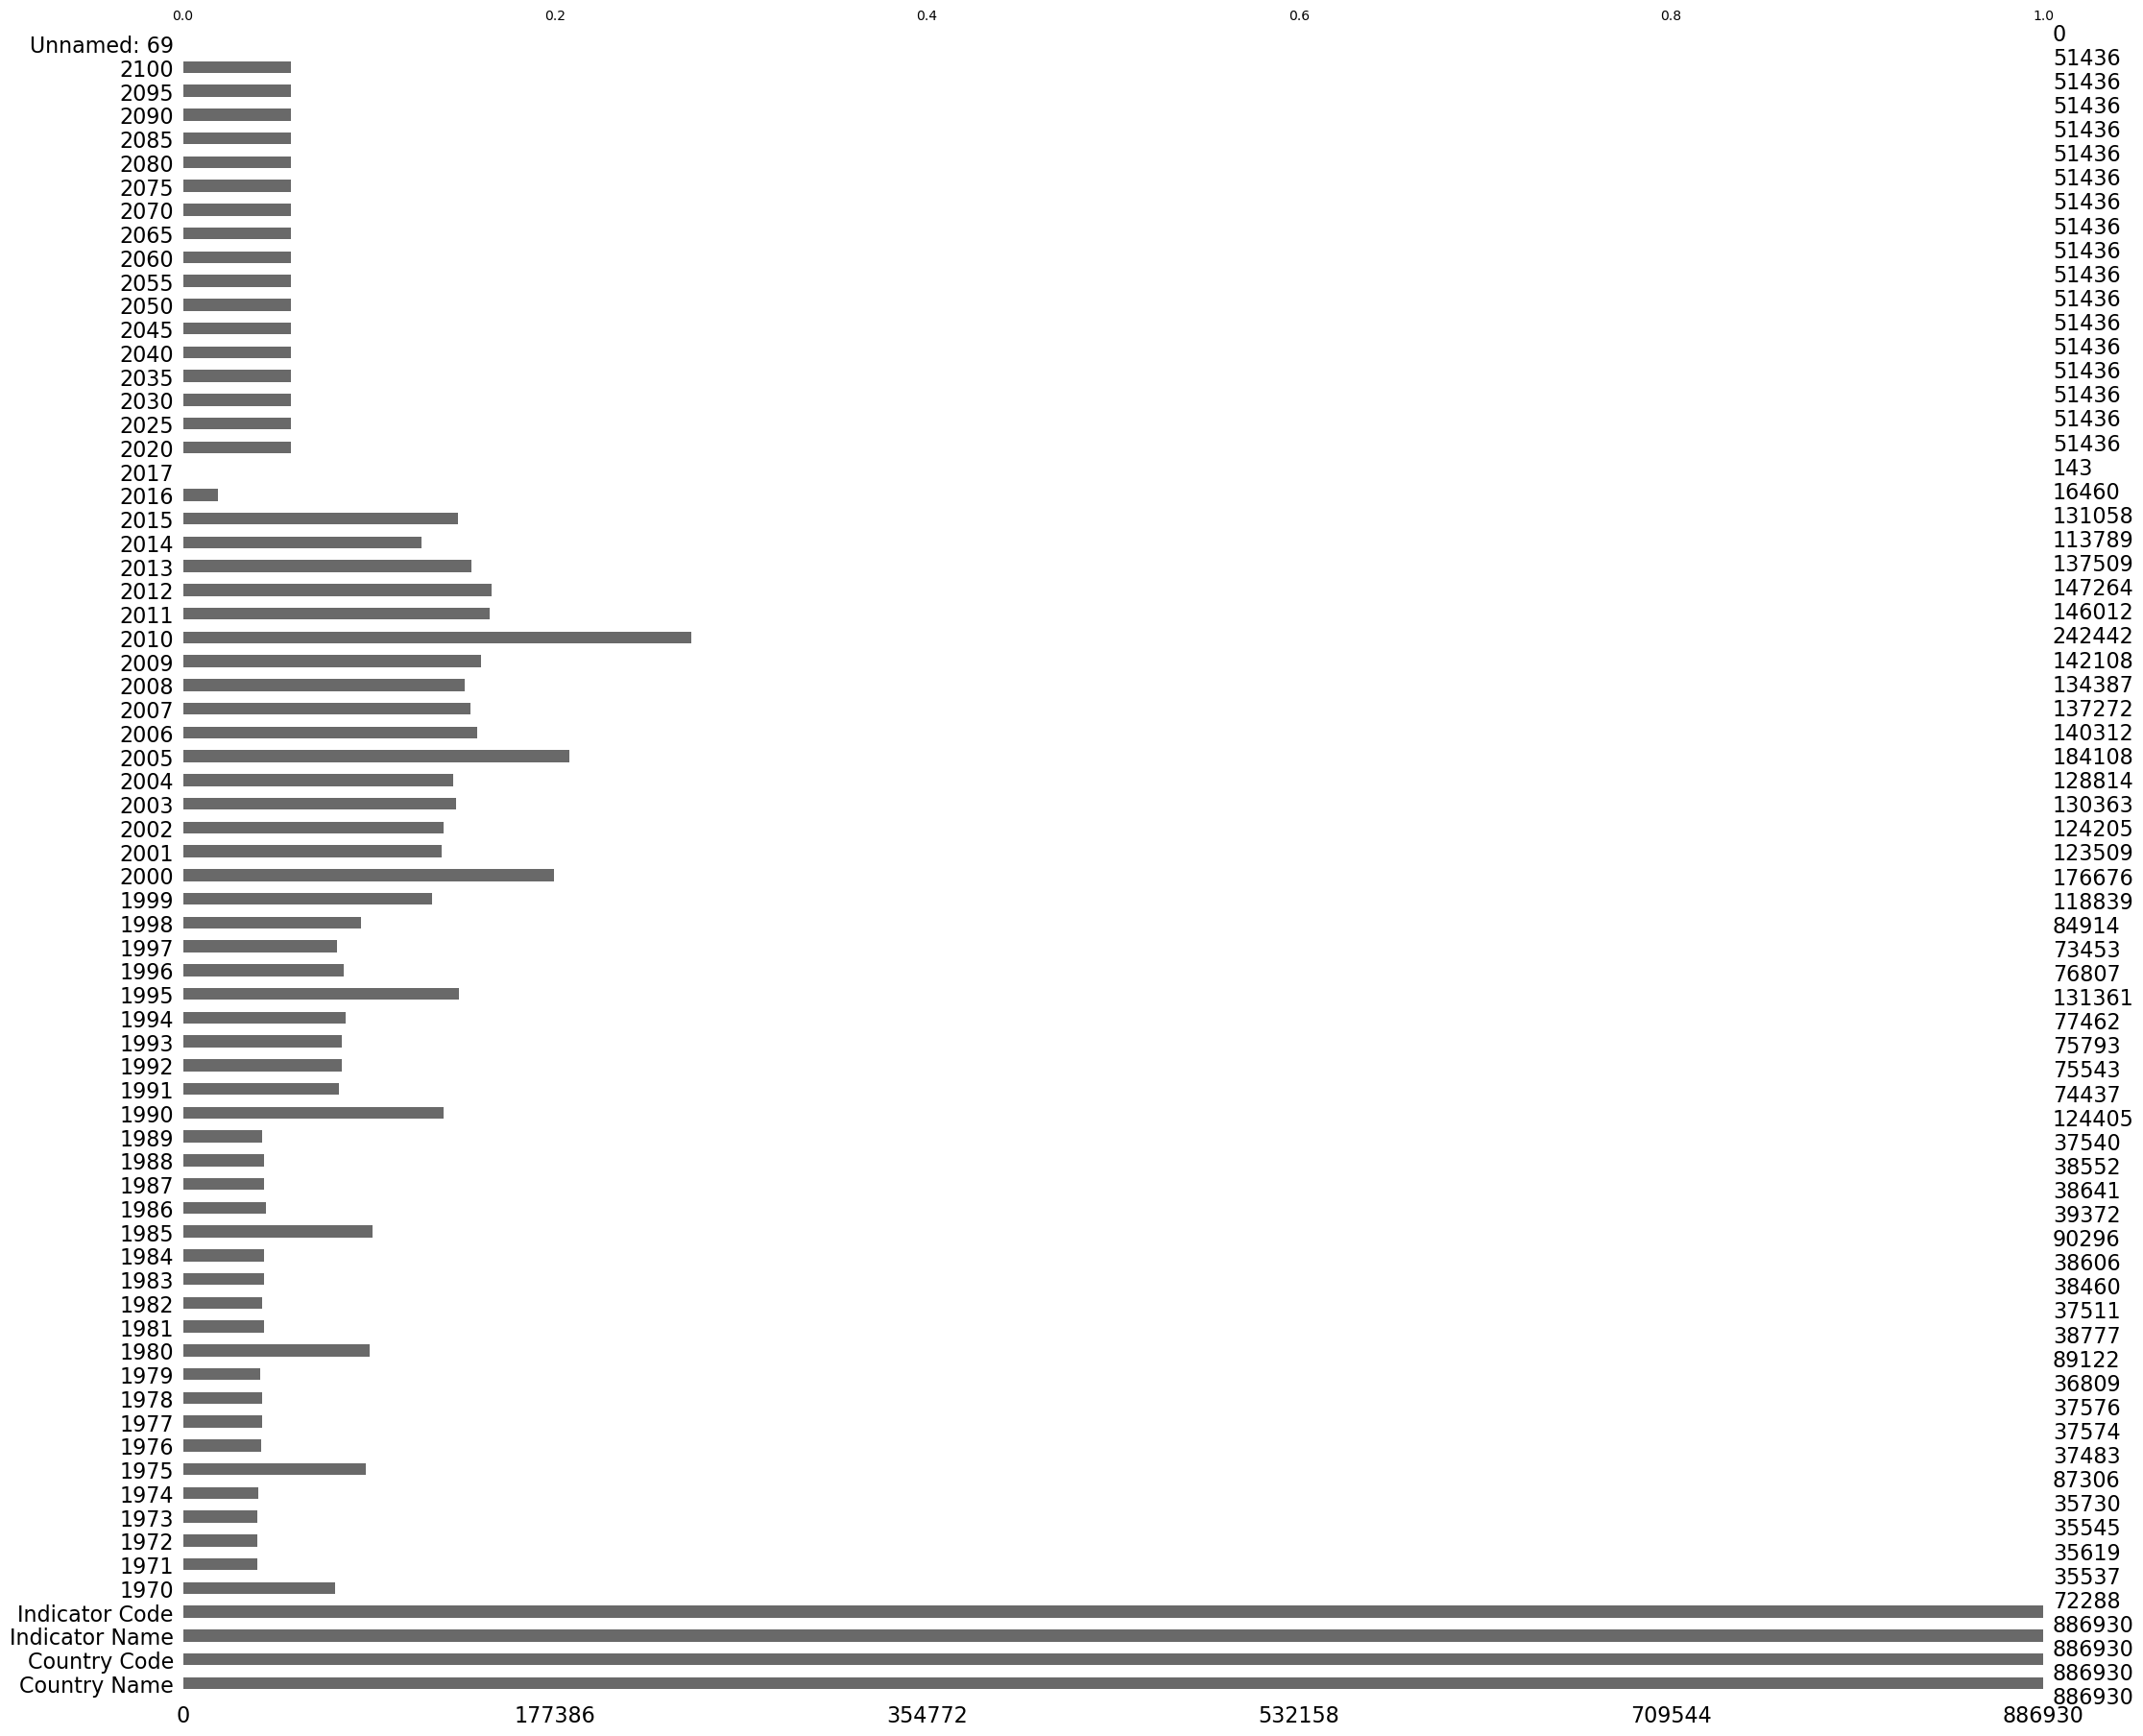

In [58]:
msno.bar(data_df)

### Vérifions si des valeurs sont dupliquées dans le dataset

In [60]:
data_df_duplicate = data_df[data_df.duplicated()]
print(f"Il y a {data_df_duplicate.shape[0]} valeurs dupliquées dans ce dataset")

Il y a 0 valeurs dupliquées dans ce dataset


### Conclusion

- Ce dataset présente les données des différents par pays et pour un semble d'années.
- Le jeu de données contient 886930 lignes et 70 colonnes.
- Nous pouvons constater qu'il manque un nombre important de données, notamment :
    - Après 2015
    - On constate que beaucoup plus de données sont présentes à partir de 1990
    - Egalement certains indicateurs ne doivent pas comporter énormément de données (la taille des barres des années étant très en déça des taille des barres des pays par exemple)
- Il ne semble pas y avoir de doublons.

Notes :
- Nous devrons procéder à une vérification si le nombre de données présentes lors de la sélection des indicateurs 
- La colonne "Unnamed: 69" est complètement vide et pourra être supprimée

In [62]:
data_df_duplicate = data_df[data_df.duplicated()]
print(f"Il y a {data_df_duplicate.shape[0]} valeurs dupliquées dans ce dataset")

Il y a 0 valeurs dupliquées dans ce dataset


## Analyse du dataset EdStatsFootNote

### Affichons les premières lignes du dataset

In [65]:
footnote_df.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


### Analyse de la forme du dataset, nombre de lignes et de colonnes

In [67]:
nombre_lignes = footnote_df.shape[0]
print(f"Il y a {nombre_lignes} lignes dans ce dataset")
nombre_colonnes = footnote_df.shape[1]
print(f"Il y a {nombre_colonnes} colonnes dans ce dataset")

Il y a 643638 lignes dans ce dataset
Il y a 5 colonnes dans ce dataset


### Affiche des informations générales sur le dataset

In [69]:
footnote_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


### Analyse du type des données présentes dans le dataset

In [71]:
footnote_df.dtypes

CountryCode     object
SeriesCode      object
Year            object
DESCRIPTION     object
Unnamed: 4     float64
dtype: object

### Vérifions si des valeurs sont manquantes dans le dataset

In [73]:
footnote_df.isnull().sum()

CountryCode         0
SeriesCode          0
Year                0
DESCRIPTION         0
Unnamed: 4     643638
dtype: int64

### Vérifions si des valeurs sont dupliquées dans le dataset

In [75]:
footnote_df_duplicate = footnote_df[footnote_df.duplicated()]
print(f"Il y a {footnote_df_duplicate.shape[0]} valeurs dupliquées dans ce dataset")

Il y a 0 valeurs dupliquées dans ce dataset


### Conclusion

- Le jeu de données contient 643638 lignes et 5 colonnes.
- Il ne semble pas y avoir de doublons.

Notes :
- La colonne "Unnamed: 4" est complètement vide et pourra être supprimée

## Analyse du dataset EdStatsSeries

### Affichons les premières lignes du dataset

In [79]:
series_df.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Analyse de la forme du dataset, nombre de lignes et de colonnes

In [81]:
nombre_lignes = series_df.shape[0]
print(f"Il y a {nombre_lignes} lignes dans ce dataset")
nombre_colonnes = series_df.shape[1]
print(f"Il y a {nombre_colonnes} colonnes dans ce dataset")

Il y a 3665 lignes dans ce dataset
Il y a 21 colonnes dans ce dataset


### Affiche des informations générales sur le dataset

In [83]:
series_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

### Analyse du type des données présentes dans le dataset

In [85]:
series_df.dtypes

Series Code                             object
Topic                                   object
Indicator Name                          object
Short definition                        object
Long definition                         object
Unit of measure                        float64
Periodicity                             object
Base Period                             object
Other notes                             object
Aggregation method                      object
Limitations and exceptions              object
Notes from original source             float64
General comments                        object
Source                                  object
Statistical concept and methodology     object
Development relevance                   object
Related source links                    object
Other web links                        float64
Related indicators                     float64
License Type                           float64
Unnamed: 20                            float64
dtype: object

### Vérifions si des valeurs sont manquantes dans le dataset

In [87]:
series_df.isnull().sum()

Series Code                               0
Topic                                     0
Indicator Name                            0
Short definition                       1509
Long definition                           0
Unit of measure                        3665
Periodicity                            3566
Base Period                            3351
Other notes                            3113
Aggregation method                     3618
Limitations and exceptions             3651
Notes from original source             3665
General comments                       3651
Source                                    0
Statistical concept and methodology    3642
Development relevance                  3662
Related source links                   3450
Other web links                        3665
Related indicators                     3665
License Type                           3665
Unnamed: 20                            3665
dtype: int64

### Vérifions si des valeurs sont dupliquées dans le dataset

In [89]:
series_df_duplicate = series_df[series_df.duplicated()]
print(f"Il y a {series_df_duplicate.shape[0]} valeurs dupliquées dans ce dataset")

Il y a 0 valeurs dupliquées dans ce dataset


### Conclusion

- Ce dataset présente la description des différents indicateurs présents dans l'étude.
- Le jeu de données contient 3665 lignes et 21 colonnes.
- Nous pouvons constater qu'il manque un nombre important de données, cependant la définition longue est présente pour chaque indicateur.
- Il ne semble pas y avoir de doublons.

Notes :
- Nous pourrons nous appuyer sur ce jeu de données pour faire notre sélection d'indicateurs.
- La colonne "Unnamed: 69" est complètement vide et pourra être supprimée

# Etape 2 : Sélectionnez les données pertinentes

## Plage de temps étudiée

Lors de notre analyse du dataframe data, nous avons constaté que les années répertoriant le plus d'informations sont comprises entre 1990 et 2015. 
Commencons par réduire la taille de notre jeu de données data en supprimant les années qui ne semblent pas pertinentes.

In [93]:
# On récupère la liste des colonnes dans une liste
annees = data_df.columns.to_list()

In [94]:
# On supprime les colonnes ne représentant pas des années
annees.remove('Country Name')
annees.remove('Country Code')
annees.remove('Indicator Name')
annees.remove('Indicator Code')
annees.remove('Unnamed: 69')

In [95]:
# Pour chaque année dans la liste, on vérifie si elle est supérieure à 1990 et inférieure à 2015 pour décider ou non de la supprimer
annees_a_suppr = []
annees_conservees = []
for annee in annees :
    if int(annee) < 1990 :
        annees_a_suppr.append(annee)
    elif int(annee) > 2015 :
        annees_a_suppr.append(annee)
    else :
        annees_conservees.append(annee)

In [96]:
# On supprime toutes les colonnes des années que nous avons précédemment sélectionné
data = data_df.drop(labels=annees_a_suppr, axis= 1)

## Réorganisons notre dataframe

Afin de faciliter les études ultérieures, nous allons réorganiser notre dataframe comme suit :
- une colonne pour l'indicator code
- une colonne pour l'indicator name
- une colonne pour le country name
- une colonne pour le country code
- une colonne pour les années
- une colonnes pour les valeurs

In [98]:
data_melted = data.melt(id_vars=["Indicator Code", "Indicator Name", "Country Code", "Country Name"], 
             value_vars=annees_conservees,
             var_name="Year", value_name="Values")
data_melted

,Indicator Code,Indicator Name,Country Code,Country Name,Year,Values
0,UIS.NERA.2,"Adjusted net enrolment rate, lower secondary, ...",ARB,Arab World,1990,NaN
1,UIS.NERA.2.F,"Adjusted net enrolment rate, lower secondary, ...",ARB,Arab World,1990,NaN
2,UIS.NERA.2.GPI,"Adjusted net enrolment rate, lower secondary, ...",ARB,Arab World,1990,NaN
3,UIS.NERA.2.M,"Adjusted net enrolment rate, lower secondary, ...",ARB,Arab World,1990,NaN
4,SE.PRM.TENR,"Adjusted net enrolment rate, primary, both sex...",ARB,Arab World,1990,71.995819
...,...,...,...,...,...,...
23060175,UIS.LP.AG15T24.M,"Youth illiterate population, 15-24 years, male...",ZWE,Zimbabwe,2015,NaN
23060176,SE.ADT.1524.LT.ZS,"Youth literacy rate, population 15-24 years, b...",ZWE,Zimbabwe,2015,NaN
23060177,SE.ADT.1524.LT.FE.ZS,"Youth literacy rate, population 15-24 years, f...",ZWE,Zimbabwe,2015,NaN
23060178,SE.ADT.1524.LT.FM.ZS,"Youth literacy rate, population 15-24 years, g...",ZWE,Zimbabwe,2015,NaN


## Volume de données de chaque indicateur

Dans notre dataframe data, nous allons ici chercher à mettre en évidence la quantité de données disponible pour chaque indicateur, cela nous permettra de sélectionner uniquement des indicateurs pour lesquels nous aurons un volume de données suffisant (ce volume étant à déterminer!)

In [100]:
# Premièrement on utilise un groupby pour compter le nombre de valeurs présentes pour chaque indicateur année par année
indicators_count = data_melted.groupby(["Indicator Code"], as_index=False).count().sort_values(by="Values", ascending=True)
indicators_count

,Indicator Code,Indicator Name,Country Code,Country Name,Year,Values
2187,SABER.TER.GOAL4,6292,6292,6292,6292,0
2196,SABER.TER.GOAL6.LVL3,6292,6292,6292,6292,0
2195,SABER.TER.GOAL6.LVL2,6292,6292,6292,6292,0
2194,SABER.TER.GOAL6.LVL1,6292,6292,6292,6292,0
2193,SABER.TER.GOAL6,6292,6292,6292,6292,0
...,...,...,...,...,...,...
2510,SP.POP.1564.TO.ZS,6292,6292,6292,6292,5690
1662,NY.GDP.PCAP.CD,6292,6292,6292,6292,5732
1658,NY.GDP.MKTP.CD,6292,6292,6292,6292,5735
2589,SP.POP.GROW,6292,6292,6292,6292,6197


In [101]:
# Supprimons les indicateurs pour lesquels nous avons au moins la moitié des valeurs
# Note : pour chaque indicateur nous avons toutes les années de renseignées, 
# cela représente donc 6292 valeurs possible, soit 3146 pour la moitié
# Lors du deuxième échantillonage, nous conserversons 1258 en valeur de référence soit 20% de l'échantillon total
indicators_empty = indicators_count.loc[indicators_count["Values"] < 1258, "Indicator Code"]

In [102]:
# Afin d'avoir un dataframe, effectuons un reset index
indicators_empty = indicators_empty.reset_index()
indicators_empty.shape

(2950, 2)

Nous avons ici choisit de conserver les indicateurs pour lesquels nous avons suffisament de données (à 50%).

Nous conservons ainsi 368 indicateurs : 3665 indicateurs au départ moins 3297 à supprimer

Ayant été trop restrictif en ne sélectionnant que les indicateurs ne contenant que 50% de données et étant donné que certains indicateurs ne sont complétés qu'une fois tous les 5 ans, soit 20% de notre échantillon temporel, nous avons utiliser ce nouveau seuil.

Nous conservons ainsi 715 indicateurs : 3655 indicateurs de départ moins 2950 à supprimer

Simplifions notre dataframe

In [105]:
# On compare la colonne "Indicator Code" du dataframe avec la série des "Indicator Code" sélectionnée auparavant
data = data_melted.loc[~(data_melted["Indicator Code"].isin(indicators_empty["Indicator Code"].to_list())), :]
data

,Indicator Code,Indicator Name,Country Code,Country Name,Year,Values
0,UIS.NERA.2,"Adjusted net enrolment rate, lower secondary, ...",ARB,Arab World,1990,NaN
1,UIS.NERA.2.F,"Adjusted net enrolment rate, lower secondary, ...",ARB,Arab World,1990,NaN
2,UIS.NERA.2.GPI,"Adjusted net enrolment rate, lower secondary, ...",ARB,Arab World,1990,NaN
3,UIS.NERA.2.M,"Adjusted net enrolment rate, lower secondary, ...",ARB,Arab World,1990,NaN
4,SE.PRM.TENR,"Adjusted net enrolment rate, primary, both sex...",ARB,Arab World,1990,71.995819
...,...,...,...,...,...,...
23059859,UIS.UAPP.23.F,Under-age enrolment ratio in secondary educati...,ZWE,Zimbabwe,2015,NaN
23059860,UIS.UAPP.23.M,Under-age enrolment ratio in secondary educati...,ZWE,Zimbabwe,2015,NaN
23059861,SL.UEM.TOTL.FE.ZS,"Unemployment, female (% of female labor force)",ZWE,Zimbabwe,2015,5.100000
23059862,SL.UEM.TOTL.MA.ZS,"Unemployment, male (% of male labor force)",ZWE,Zimbabwe,2015,5.100000


## Réduction du dataframe series_df avec les même indicateurs que précédemment

In [107]:
series_df = series_df.loc[series_df["Series Code"].isin(data["Indicator Code"].to_list()), :]
series_df

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
610,IT.CMP.PCMP.P2,Infrastructure: Communications,Personal computers (per 100 people),NaN,Personal computers are self-contained computer...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,Restricted use: Please cite the International ...,"International Telecommunication Union, World T...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
611,IT.NET.USER.P2,Infrastructure: Communications,Internet users (per 100 people),NaN,Internet users are individuals who have used t...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,Please cite the International Telecommunicatio...,"International Telecommunication Union, World T...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1658,NY.GDP.MKTP.CD,Economic Policy & Debt: National accounts: US$...,GDP (current US$),NaN,GDP at purchaser's prices is the sum of gross ...,NaN,Annual,NaN,NaN,Gap-filled total,...,NaN,NaN,"World Bank national accounts data, and OECD Na...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1659,NY.GDP.MKTP.KD,Economic Policy & Debt: National accounts: US$...,GDP (constant 2010 US$),NaN,GDP at purchaser's prices is the sum of gross ...,NaN,Annual,2010,NaN,Gap-filled total,...,NaN,NaN,"World Bank national accounts data, and OECD Na...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1660,NY.GDP.MKTP.PP.CD,Economic Policy & Debt: Purchasing power parity,"GDP, PPP (current international $)",NaN,PPP GDP is gross domestic product converted to...,NaN,Annual,NaN,NaN,Gap-filled total,...,NaN,NaN,"World Bank, International Comparison Program d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3589,UIS.XGDP.56.FSGOV,Expenditures,Government expenditure on tertiary education a...,NaN,"Total general (local, regional and central) go...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3592,UIS.XGOVEXP.IMF.1,Expenditures,Expenditure on primary as % of total governmen...,NaN,"Total general (local, regional and central) go...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3594,UIS.XGOVEXP.IMF.23,Expenditures,Expenditure on secondary as % of total governm...,NaN,"Total general (local, regional and central) go...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3598,UIS.XGOVEXP.IMF.56,Expenditures,Expenditure on tertiary as % of total governme...,NaN,"Total general (local, regional and central) go...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Note : nous n'avons plus que 693 indicateurs, contre 715 dans le dataframe data.

## Consultation d'un expert "métier" pour nous aider dans notre sélection

Celui-ci nous propose des idées d'indicateurs pertinents 
1. Niveau d'éducation de la population :
- Taux de scolarisation dans l'enseignement secondaire et supérieur.
- Taux de diplomation dans le secondaire et l'enseignement supérieur.

2. Compétences numériques :
- Pourcentage de la population avec des compétences de base en informatique ou en technologie numérique.
- Programmes d’éducation technologique ou initiatives gouvernementales liées à l’apprentissage en ligne.

3. Investissement en éducation :
- Dépenses publiques consacrées à l’éducation, particulièrement dans l'enseignement supérieur.
- Politiques nationales favorisant l'accès à l'éducation en ligne ou à distance.

4. Accès aux infrastructures numériques :
- Taux de couverture du réseau internet à haut débit (broadband penetration rate).
- Taux de couverture mobile, en particulier la 4G ou la 5G.

5. Langues parlées :
- Distribution linguistique pour comprendre dans quelles langues les cours en ligne devraient être proposés.

6. Pouvoir d'achat et développement économique :
- Revenu moyen par habitant ou PIB par habitant, pour évaluer la capacité des familles ou des étudiants à investir dans des services éducatifs en ligne.

7. Taux de chômage des jeunes :
- Indicateur de la demande potentielle pour des formations en ligne visant à améliorer les compétences et l'employabilité.

8. Démographie des étudiants :
- Proportion de la population âgée de 15 à 24 ans (groupe cible pour des cours de niveau lycée ou universitaire).

Nous utiliserons ces pistes pour la sélection de nos indicateurs

### Créons une liste pour stocker les indicateurs que nous sélectionnerons au fur et à mesure

In [112]:
indicateurs = []

### Notre startup propose des contenus en ligne, intéressons nous donc à la catégorie "Infrastructure: Communications"

In [114]:
series_df.loc[series_df["Topic"]=="Infrastructure: Communications"]

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
610,IT.CMP.PCMP.P2,Infrastructure: Communications,Personal computers (per 100 people),NaN,Personal computers are self-contained computer...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,Restricted use: Please cite the International ...,"International Telecommunication Union, World T...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
611,IT.NET.USER.P2,Infrastructure: Communications,Internet users (per 100 people),NaN,Internet users are individuals who have used t...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,Please cite the International Telecommunicatio...,"International Telecommunication Union, World T...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
data.loc[data["Indicator Code"] == "IT.NET.USER.P2", "Values"].count() * 100 / 6292

81.10298792116974

L'indicateur présente bien des données, environ 81% de remplissage, il est donc retenu

In [117]:
indicateurs.append("IT.NET.USER.P2")

In [118]:
data.loc[data["Indicator Code"] == "IT.CMP.PCMP.P2", "Values"].count() * 100 / 6292

41.78321678321678

L'indicateur présente bien des données, environ 41% de remplissage, il est donc retenu

In [120]:
indicateurs.append("IT.CMP.PCMP.P2")

### Recherchons des données sur le taux de scolarisation

#### Dans l'enseignement secondaire

In [123]:
pd.set_option('max_colwidth', None)
series_df.loc[(series_df["Series Code"].str.contains("SEC")), ["Series Code", "Long definition"]]

,Series Code,Long definition
2219,SE.ENR.SECO.FM.ZS,"Ratio of female gross enrolment ratio for secondary to male gross enrolment ratio for secondary. It is calculated by dividing the female value for the indicator by the male value for the indicator. A GPI equal to 1 indicates parity between females and males. In general, a value less than 1 indicates disparity in favor of males and a value greater than 1 indicates disparity in favor of females."
2287,SE.SEC.AGES,"Age at which students would enter lower secondary education, assuming they had started at the official entrance age for the lowest level of education, had studied full-time throughout and had progressed through the system without repeating or skipping a grade."
2288,SE.SEC.CMPT.LO.FE.ZS,"Total number of new female entrants in the last grade of lower secondary education, regardless of age, expressed as percentage of the total female population of the theoretical entrance age to the last grade of lower secondary. This indicator is also known as ""Gross intake rate to the last grade of lower secondary general education."" The ratio can exceed 100 percent due to over-aged and under-aged children who enter lower secondary school late/early and/or repeat grades. Data limitations preclude adjusting for students who drop out during the final year of lower secondary education. Thus this rate is a proxy that should be taken as an upper estimate of the actual lower secondary completion rate."
2289,SE.SEC.CMPT.LO.MA.ZS,"Total number of new male entrants in the last grade of lower secondary education, regardless of age, expressed as percentage of the total male population of the theoretical entrance age to the last grade of lower secondary. This indicator is also known as ""Gross intake rate to the last grade of lower secondary general education."" The ratio can exceed 100 percent due to over-aged and under-aged children who enter lower secondary school late/early and/or repeat grades. Data limitations preclude adjusting for students who drop out during the final year of lower secondary education. Thus this rate is a proxy that should be taken as an upper estimate of the actual lower secondary completion rate."
2290,SE.SEC.CMPT.LO.ZS,"Total number of new entrants in the last grade of lower secondary education, regardless of age, expressed as percentage of the total population of the theoretical entrance age to the last grade of lower secondary. This indicator is also known as ""Gross intake rate to the last grade of lower secondary general education."" The ratio can exceed 100 percent due to over-aged and under-aged children who enter lower secondary school late/early and/or repeat grades. Data limitations preclude adjusting for students who drop out during the final year of lower secondary education. Thus this rate is a proxy that should be taken as an upper estimate of the actual lower secondary completion rate."
2291,SE.SEC.DURS,Number of grades (years) in secondary education (ISCED 2 and 3).
2293,SE.SEC.DURS.UP,Number of grades (years) in upper secondary education.
2294,SE.SEC.ENRL,Total number of students enrolled at public and private secondary education institutions regardless of age.
2295,SE.SEC.ENRL.FE,Total number of female students enrolled at public and private secondary education institutions regardless of age.
2296,SE.SEC.ENRL.FE.VO.ZS,"Total number of female students enrolled in vocational programmes at the secondary education level, expressed as a percentage of the total number of female students enrolled in all programmes (vocational and general) at the secondary level. Vocational education is designed for learners to acquire the knowledge, skills and competencies specific to a particular occupation or trade or class of occupations or trades. Vocational education may have work-based components (e.g. apprenticeships). Successful completion of such programmes leads to labour-market relevant vocational qualifications acknowledged as occupationally-oriented by the re

Cet indicateur présente le nombre total d'élèves en age d'être dans le secondaire qui sont effectivement inscrit dans le secondaire

In [125]:
data.loc[data["Indicator Code"] == "SE.SEC.ENRR", "Values"].count() * 100 / 6292

65.38461538461539

L'indicateur présente bien des données, environ 65% de remplissage, il est donc retenu

In [127]:
indicateurs.append("SE.SEC.ENRR")

#### Dans l'enseignement supérieur

In [129]:
series_df.loc[(series_df["Series Code"].str.contains("TER")), ["Series Code", "Long definition"]]

,Series Code,Long definition
2220,SE.ENR.TERT.FM.ZS,"Ratio of female gross enrolment ratio for tertiary to male gross enrolment ratio for tertiary. It is calculated by dividing the female value for the indicator by the male value for the indicator. A GPI equal to 1 indicates parity between females and males. In general, a value less than 1 indicates disparity in favor of males and a value greater than 1 indicates disparity in favor of females."
2332,SE.TER.ENRL,The total number of students enrolled at public and private tertiary education institutions.
2333,SE.TER.ENRL.FE,The total number of female students enrolled at public and private tertiary education institutions.
2334,SE.TER.ENRL.FE.ZS,Number of female students at the tertiary education level (ISCED 5 to 8) expressed as a percentage of the total number of students (male and female) at the tertiary education level (ISCED 5 to 8) in a given school year.
2335,SE.TER.ENRR,"Total enrollment in tertiary education (ISCED 5 to 8), regardless of age, expressed as a percentage of the total population of the five-year age group following on from secondary school leaving."
2336,SE.TER.ENRR.FE,"Total female enrollment in tertiary education (ISCED 5 to 8), regardless of age, expressed as a percentage of the total female population of the five-year age group following on from secondary school leaving."
2337,SE.TER.ENRR.MA,"Total male enrollment in tertiary education (ISCED 5 to 8), regardless of age, expressed as a percentage of the total male population of the five-year age group following on from secondary school leaving."
2338,SE.TER.GRAD,Total number of students successfully completing tertiary education programmes (ISCED 5 to 8) in public and private tertiary education institutions during the reference academic year.
2345,SE.TER.GRAD.FE,Total number of female students successfully completing tertiary education programmes (ISCED 5 to 8) in public and private tertiary education institutions during the reference academic year.
2355,SE.TER.GRAD.FE.ZS,Number of females completing tertiary education programmes (ISCED 5 to 8) expressed as a percentage of the total number of students (male and female) completing tertiary education programmes (ISCED 5 to 8) in the reference year.


In [130]:
data.loc[data["Indicator Code"] == "SE.TER.ENRR", "Values"].count() * 100 / 6292

59.10680228862047

L'indicateur présente bien des données, environ 60% de remplissage, il est donc retenu

In [132]:
indicateurs.append("SE.TER.ENRR")

### Recherchons des données sur le taux de diplomation

In [134]:
series_df.loc[(series_df["Long definition"].str.contains("graduates", case=False, na=False)), ["Series Code", "Long definition"]]

,Series Code,Long definition


In [135]:
series_df.loc[(series_df["Long definition"].str.contains("diplom", case=False, na=False)), ["Series Code", "Long definition"]]

,Series Code,Long definition


In [136]:
series_df.loc[(series_df["Long definition"].str.contains("exam", case=False, na=False)), ["Series Code", "Long definition"]]

,Series Code,Long definition
2256,SE.PRM.NENR,"Total number of students in the theoretical age group for primary education enrolled in that level, expressed as a percentage of the total population in that age group. Divide the number of students enrolled who are of the official age group for primary education by the population for the same age group and multiply the result by 100. NER at each level of education should be based on enrolment of the relevant age group in all types of schools and education institutions, including public, private and all other institutions that provide organized educational programmes. A high NER denotes a high degree of coverage for the official school-age population. The theoretical maximum value is 100%. Increasing trends can be considered as reflecting improving coverage at the specified level of education. When the NER is compared with the GER, the difference between the two highlights the incidence of under-aged and over-aged enrolment. If the NER is below 100%, then the complement, i.e. the difference with 100%, provides a measure of the proportion of children not enrolled at the specified level of education. However, since some of these children/youth could be enrolled at other levels of education, this difference should in no way be considered as indicating the percentage of students not enrolled. To measure universal primary education, for example, adjusted primary NER is calculated on the basis of the percentage of children in the official primary school age range who are enrolled in either primary or secondary education. A more precise complementary indicator is the Age-specific enrolment ratio (ASER) which shows the participation in education of the population of each particular age, regardless of the level of education."
2257,SE.PRM.NENR.FE,"Total number of female students in the theoretical age group for primary education enrolled in that level, expressed as a percentage of the total female population in that age group. Divide the number of female students enrolled who are of the official age group for primary education by the female population for the same age group and multiply the result by 100. NER at each level of education should be based on enrolment of the relevant age group in all types of schools and education institutions, including public, private and all other institutions that provide organized educational programmes. A high NER denotes a high degree of coverage for the official school-age population. The theoretical maximum value is 100%. Increasing trends can be considered as reflecting improving coverage at the specified level of education. When the NER is compared with the GER, the difference between the two highlights the incidence of under-aged and over-aged enrolment. If the NER is below 100%, then the complement, i.e. the difference with 100%, provides a measure of the proportion of children not enrolled at the specified level of education. However, since some of these children/youth could be enrolled at other levels of education, this difference should in no way be considered as indicating the percentage of students not enrolled. To measure universal primary education, for example, adjusted primary NER is calculated on the basis of the percentage of children in the official primary school age range who are enrolled in either primary or secondary education. A more precise complementary indicator is the Age-specific enrolment ratio (ASER) which shows the participation in education of the population of each particular age, regardless of the level of education."
2258,SE.PRM.NENR.MA,"Total number of male students in the theoretical age group for primary education enrolled in that level, expressed as a percentage of the total male population in that age group. Divide the number of male students enrolled who are of the official age group for primary education by the male population for the same age group and multiply the result by 100. NER at each level of education s

Il ne semble pas y avoir d'indicateurs faisant mention du taux de reussite aux examens et l'obtention des diplomes.

Cependant un indicateur recense les étudiants admis au niveau supérieur. Celui-ci n'est disponible que pour le secondaire mais peut tout de même être intéressant.

In [138]:
data.loc[data["Indicator Code"] == "SE.SEC.PROG.ZS", "Values"].count() * 100 / 6292

42.72091544818817

L'indicateur présente bien des données, environ 42% de remplissage, il est donc retenu

In [140]:
indicateurs.append("SE.SEC.PROG.ZS")

Afin de compléter l'échantillon, intéressons nous également aux temps passé en études

#### La durée légale des études

In [143]:
series_df.loc[(series_df["Long definition"].str.contains("number of years", case=False, na=False)), ["Series Code", "Long definition"]]

,Series Code,Long definition
2216,SE.COM.DURS,Number of years that children are legally obliged to attend school.
2284,SE.SCH.LIFE,"Number of years a person of school entrance age can expect to spend within the specified level of education. For a child of a certain age a, the school life expectancy is calculated as the sum of the age specific enrolment rates for the levels of education specified. The part of the enrolment that is not distributed by age is divided by the school-age population for the level of education they are enrolled in, and multiplied by the duration of that level of education. The result is then added to the sum of the age-specific enrolment rates. A relatively high SLE indicates greater probability for children to spend more years in education and higher overall retention within the education system. It must be noted that the expected number of years does not necessarily coincide with the expected number of grades of education completed, because of repetition. Since school life expectancy is an average based on participation in different levels of education, the expected number of years of schooling may be pulled down by the magnitude of children who never go to school. Those children who are in school may benefit from many more years of education than the average."
2285,SE.SCH.LIFE.FE,"Number of years a person of school entrance age can expect to spend within the specified level of education. For a child of a certain age a, the school life expectancy is calculated as the sum of the age specific enrolment rates for the levels of education specified. The part of the enrolment that is not distributed by age is divided by the school-age population for the level of education they are enrolled in, and multiplied by the duration of that level of education. The result is then added to the sum of the age-specific enrolment rates. A relatively high SLE indicates greater probability for children to spend more years in education and higher overall retention within the education system. It must be noted that the expected number of years does not necessarily coincide with the expected number of grades of education completed, because of repetition. Since school life expectancy is an average based on participation in different levels of education, the expected number of years of schooling may be pulled down by the magnitude of children who never go to school. Those children who are in school may benefit from many more years of education than the average."
2286,SE.SCH.LIFE.MA,"Number of years a person of school entrance age can expect to spend within the specified level of education. For a child of a certain age a, the school life expectancy is calculated as the sum of the age specific enrolment rates for the levels of education specified. The part of the enrolment that is not distributed by age is divided by the school-age population for the level of education they are enrolled in, and multiplied by the duration of that level of education. The result is then added to the sum of the age-specific enrolment rates. A relatively high SLE indicates greater probability for children to spend more years in education and higher overall retention within the education system. It must be noted that the expected number of years does not necessarily coincide with the expected number of grades of education completed, because of repetition. Since school life expectancy is an average based on participation in different levels of education, the expected number of years of schooling may be pulled down by the magnitude of children who never go to school. Those children who are in school may benefit from many more years of education than the average."
3479,UIS.SLE.0,"Number of years a person of school entrance age can expect to spend within the specified level of education. For a child of a certain age a, the school life expectancy is calculated as the sum of the age specific enrolment rates for the levels of education specified. The part of

In [144]:
data.loc[data["Indicator Code"] == "SE.COM.DURS", "Values"].count() * 100 / 6292

51.4780673871583

L'indicateur présente bien des données, environ 51% de remplissage, il est donc retenu

In [146]:
indicateurs.append("SE.COM.DURS")

#### Le nombre d'années que les étudiants peuvent espérer passer à l'école

In [148]:
data.loc[data["Indicator Code"] == "SE.SCH.LIFE", "Values"].count() * 100 / 6292

52.41576605212969

L'indicateur présente bien des données, environ 52% de remplissage, il est donc retenu

In [150]:
indicateurs.append("SE.SCH.LIFE")

In [151]:
series_df.loc[(series_df["Long definition"].str.contains("Graduation", case=False, na=False))
    & (series_df["Topic"] == "Tertiary")]["Long definition"].value_counts()

Series([], Name: count, dtype: int64)

In [152]:
series_df.loc[(series_df["Long definition"].str.contains("Number of graduates from first degree programmes", case=False, na=False))
    & (series_df["Topic"] == "Tertiary")]

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20


In [153]:
data_df.loc[data_df["Indicator Code"] == "SE.TER.CMPL.ZS", :].shape[0]

242

L'indicateur est présent pour 242 lignes, ce qui est cohérent avec ce que présente le dataset "EdStatsCountry"

### Recherchons des données sur les revenus

#### Revenu moyen par habitant

In [157]:
series_df.loc[(series_df["Long definition"].str.contains("salar", case=False, na=False)), ["Series Code", "Long definition"]]

,Series Code,Long definition


Aucun indicateur ne semble mentionner de données sur le niveau de salaire.

#### PIB par habitant

In [160]:
series_df.loc[(series_df["Long definition"].str.contains("GNP", case=False, na=False)), ["Series Code", "Long definition"]]

,Series Code,Long definition
1666,NY.GNP.MKTP.CD,GNI (formerly GNP) is the sum of value added by all resident producers plus any product taxes (less subsidies) not included in the valuation of output plus net receipts of primary income (compensation of employees and property income) from abroad. Data are in current U.S. dollars.
1667,NY.GNP.MKTP.PP.CD,PPP GNI (formerly PPP GNP) is gross national income (GNI) converted to international dollars using purchasing power parity rates. An international dollar has the same purchasing power over GNI as a U.S. dollar has in the United States. Gross national income is the sum of value added by all resident producers plus any product taxes (less subsidies) not included in the valuation of output plus net receipts of primary income (compensation of employees and property income) from abroad. Data are in current international dollars. For most economies PPP figures are extrapolated from the 2011 International Comparison Program (ICP) benchmark estimates or imputed using a statistical model based on the 2011 ICP. For 47 high- and upper middle-income economies conversion factors are provided by Eurostat and the Organisation for Economic Co-operation and Development (OECD).
1668,NY.GNP.PCAP.CD,"GNI per capita (formerly GNP per capita) is the gross national income, converted to U.S. dollars using the World Bank Atlas method, divided by the midyear population. GNI is the sum of value added by all resident producers plus any product taxes (less subsidies) not included in the valuation of output plus net receipts of primary income (compensation of employees and property income) from abroad. GNI, calculated in national currency, is usually converted to U.S. dollars at official exchange rates for comparisons across economies, although an alternative rate is used when the official exchange rate is judged to diverge by an exceptionally large margin from the rate actually applied in international transactions. To smooth fluctuations in prices and exchange rates, a special Atlas method of conversion is used by the World Bank. This applies a conversion factor that averages the exchange rate for a given year and the two preceding years, adjusted for differences in rates of inflation between the country, and through 2000, the G-5 countries (France, Germany, Japan, the United Kingdom, and the United States). From 2001, these countries include the Euro area, Japan, the United Kingdom, and the United States."


In [161]:
data.loc[data["Indicator Code"] == "NY.GNP.PCAP.CD", "Values"].count() * 100 / 6292

84.83788938334393

L'indicateur présente bien des données, environ 84% de remplissage, il est donc retenu

In [163]:
indicateurs.append("NY.GNP.MKTP.PP.CD")

### Recherchons des données démographiques

#### Proportion de la population agée de 15 à 24ans (niveau lycée ou universitaire)

In [166]:
series_df.loc[(series_df["Long definition"].str.contains("population", case=False, na=False))
    & (series_df["Long definition"].str.contains("15", case=False, na=False)), ["Series Code", "Long definition"]]

,Series Code,Long definition
2450,SP.POP.1015.FE.UN,"Population, ages 10-15, female is the total number of females age 10-15."
2451,SP.POP.1015.MA.UN,"Population, ages 10-15, male is the total number of males age 10-15."
2452,SP.POP.1015.TO.UN,"Population, ages 10-15, total is the total population age 10-15."
2462,SP.POP.1115.FE.UN,"Population, ages 11-15, female is the total number of females age 11-15."
2463,SP.POP.1115.MA.UN,"Population, ages 11-15, male is the total number of males age 11-15."
2464,SP.POP.1115.TO.UN,"Population, ages 11-15, total is the total population age 11-15."
2474,SP.POP.1215.FE.UN,"Population, ages 12-15, female is the total number of females age 12-15."
2475,SP.POP.1215.MA.UN,"Population, ages 12-15, male is the total number of males age 12-15."
2476,SP.POP.1215.TO.UN,"Population, ages 12-15, total is the total population age 12-15."
2504,SP.POP.1524.FE.UN,"Population, ages 15-24, female is the total number of females age 15-24."


In [167]:
data.loc[data["Indicator Code"] == "SP.POP.1524.TO.UN", "Values"].count() * 100 / 6292

76.09663064208519

L'indicateur présente bien des données, environ 76% de remplissage, il est donc retenu

In [169]:
indicateurs.append("SP.POP.1524.TO.UN")

#### Nombre de professeurs

In [171]:
series_df.loc[(series_df["Long definition"].str.contains("teacher", case=False, na=False)), ["Series Code", "Long definition"]]

,Series Code,Long definition
2224,SE.PRE.ENRL.TC.ZS,"Average number of pupils per teacher at a given level of education, based on headcounts of both pupils and teachers. Divide the total number of pupils enrolled at the specified level of education by the number of teachers at the same level. In computing and interpreting this indicator, one should take into account the existence of part-time teaching, school-shifts, multi-grade classes and other practices that may affect the precision and meaningfulness of pupil-teacher ratios. When feasible, the number of part-time teachers is converted to ‘full-time equivalent’ teachers; a double-shift teacher is counted twice, etc. Teachers are defined as persons whose professional activity involves the transmitting of knowledge, attitudes and skills that are stipulated in a formal curriculum programme to students enrolled in a formal educational institution."
2232,SE.PRE.TCHR,"Total number of teachers in public and private pre-primary education institutions. Teachers are persons employed full time or part time in an official capacity to guide and direct the learning experience of pupils and students, irrespective of their qualifications or the delivery mechanism, i.e. face-to-face and/or at a distance. This definition excludes educational personnel who have no active teaching duties (e.g. headmasters, headmistresses or principals who do not teach) and persons who work occasionally or in a voluntary capacity in educational institutions."
2233,SE.PRE.TCHR.FE,"Total number of female teachers in public and private pre-primary education institutions. Teachers are persons employed full time or part time in an official capacity to guide and direct the learning experience of pupils and students, irrespective of their qualifications or the delivery mechanism, i.e. face-to-face and/or at a distance. This definition excludes educational personnel who have no active teaching duties (e.g. headmasters, headmistresses or principals who do not teach) and persons who work occasionally or in a voluntary capacity in educational institutions."
2234,SE.PRE.TCHR.FE.ZS,"Number of female teachers at the pre-primary level expressed as a percentage of the total number of teachers (male and female) at the pre-primary level in a given school year. Teachers are persons employed full time or part time in an official capacity to guide and direct the learning experience of pupils and students, irrespective of their qualifications or the delivery mechanism, i.e. face-to-face and/or at a distance. This definition excludes educational personnel who have no active teaching duties (e.g. headmasters, headmistresses or principals who do not teach) and persons who work occasionally or in a voluntary capacity in educational institutions."
2249,SE.PRM.ENRL.TC.ZS,"Average number of pupils per teacher at a given level of education, based on headcounts of both pupils and teachers. Divide the total number of pupils enrolled at the specified level of education by the number of teachers at the same level. In computing and interpreting this indicator, one should take into account the existence of part-time teaching, school-shifts, multi-grade classes and other practices that may affect the precision and meaningfulness of pupil-teacher ratios. When feasible, the number of part-time teachers is converted to ‘full-time equivalent’ teachers; a double-shift teacher is counted twice, etc. Teachers are defined as persons whose professional activity involves the transmitting of knowledge, attitudes and skills that are stipulated in a formal curriculum programme to students enrolled in a formal educational institution."
2275,SE.PRM.TCHR,"Total number of teachers in public and private primary education institutions. Teachers are persons employed full time or part time in an official capacity to guide and direct the learning experience of pupils and students, irrespective of their qualifications or the delivery mechanism, i.e. face-to-face and/or 

In [172]:
data.loc[data["Indicator Code"] == "SE.PRE.ENRL.TC.ZS", "Values"].count() * 100 / 6292

52.44755244755245

L'indicateur présente bien des données, environ 52% de remplissage, il est donc retenu

In [174]:
indicateurs.append("SE.PRE.ENRL.TC.ZS")

### Recherchons des données sur le chomage

In [176]:
series_df.loc[(series_df["Long definition"].str.contains("unemployment", case=False, na=False)), ["Series Code", "Long definition"]]

,Series Code,Long definition
2398,SL.UEM.TOTL.FE.ZS,Unemployment refers to the share of the labor force that is without work but available for and seeking employment.
2399,SL.UEM.TOTL.MA.ZS,Unemployment refers to the share of the labor force that is without work but available for and seeking employment.
2400,SL.UEM.TOTL.ZS,Unemployment refers to the share of the labor force that is without work but available for and seeking employment.


In [177]:
data.loc[data["Indicator Code"] == "SL.UEM.TOTL.ZS", "Values"].count() * 100 / 6292

83.74125874125875

L'indicateur présente bien des données, environ 76% de remplissage, il est donc retenu

In [179]:
indicateurs.append("SL.UEM.TOTL.ZS")

### Vérification du nombre d'indicateurs sélectionnés

In [181]:
print(len(indicateurs))

11


### Premier constat

Suite à une première passe de sélection des indicateurs, nous ne trouvons que 9 indicateurs pouvant remplir nos exigences.
Etant donné que nos indicateurs sont, pour certains calculés qu'une fois tous les 5 ans, nous avons décider de diminuer le seuil de remplissage.

Après avoir élargi notre champ de recherche, nous avons réussi à identifier 2 indicateurs supplémentaires, soit 11 au total.

## Création de notre dataframe d'études
Pour cela nous sélectionnerons toutes les lignes du dataframe dont l'"Indicator Code" est présent dans la liste que nous avons créée précédemment

In [184]:
df = data[data["Indicator Code"].isin(indicateurs)]
df.head()

,Indicator Code,Indicator Name,Country Code,Country Name,Year,Values
702,SE.COM.DURS,Duration of compulsory education (years),ARB,Arab World,1990,NaN
706,SE.SEC.PROG.ZS,"Effective transition rate from primary to lower secondary general education, both sexes (%)",ARB,Arab World,1990,8.380449e+01
1253,NY.GNP.MKTP.PP.CD,"GNI, PPP (current international $)",ARB,Arab World,1990,1.457550e+12
1335,SE.SEC.ENRR,"Gross enrolment ratio, secondary, both sexes (%)",ARB,Arab World,1990,5.309990e+01
1339,SE.TER.ENRR,"Gross enrolment ratio, tertiary, both sexes (%)",ARB,Arab World,1990,1.117002e+01


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69212 entries, 702 to 23059863
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Indicator Code  69212 non-null  object 
 1   Indicator Name  69212 non-null  object 
 2   Country Code    69212 non-null  object 
 3   Country Name    69212 non-null  object 
 4   Year            69212 non-null  object 
 5   Values          43420 non-null  float64
dtypes: float64(1), object(5)
memory usage: 3.7+ MB


<Axes: >

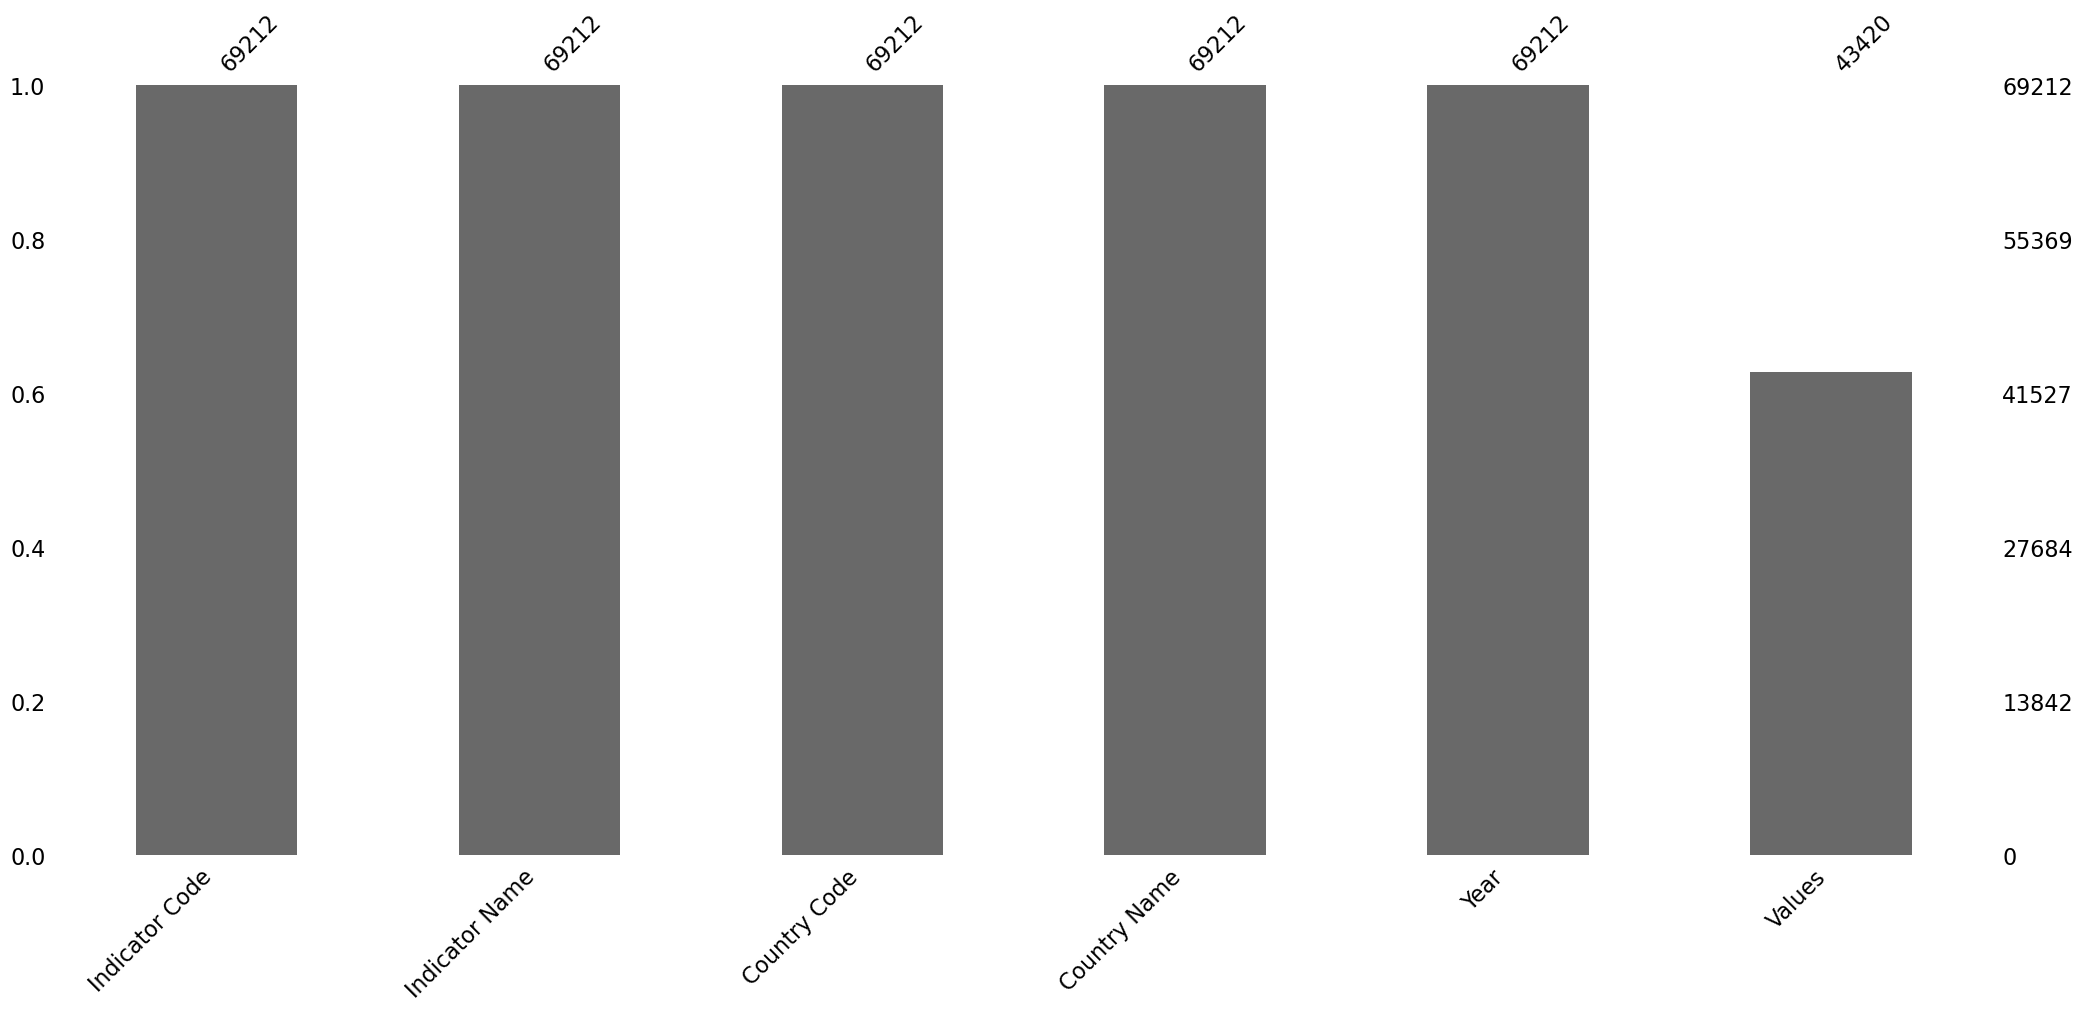

In [186]:
msno.bar(df)

<Axes: >

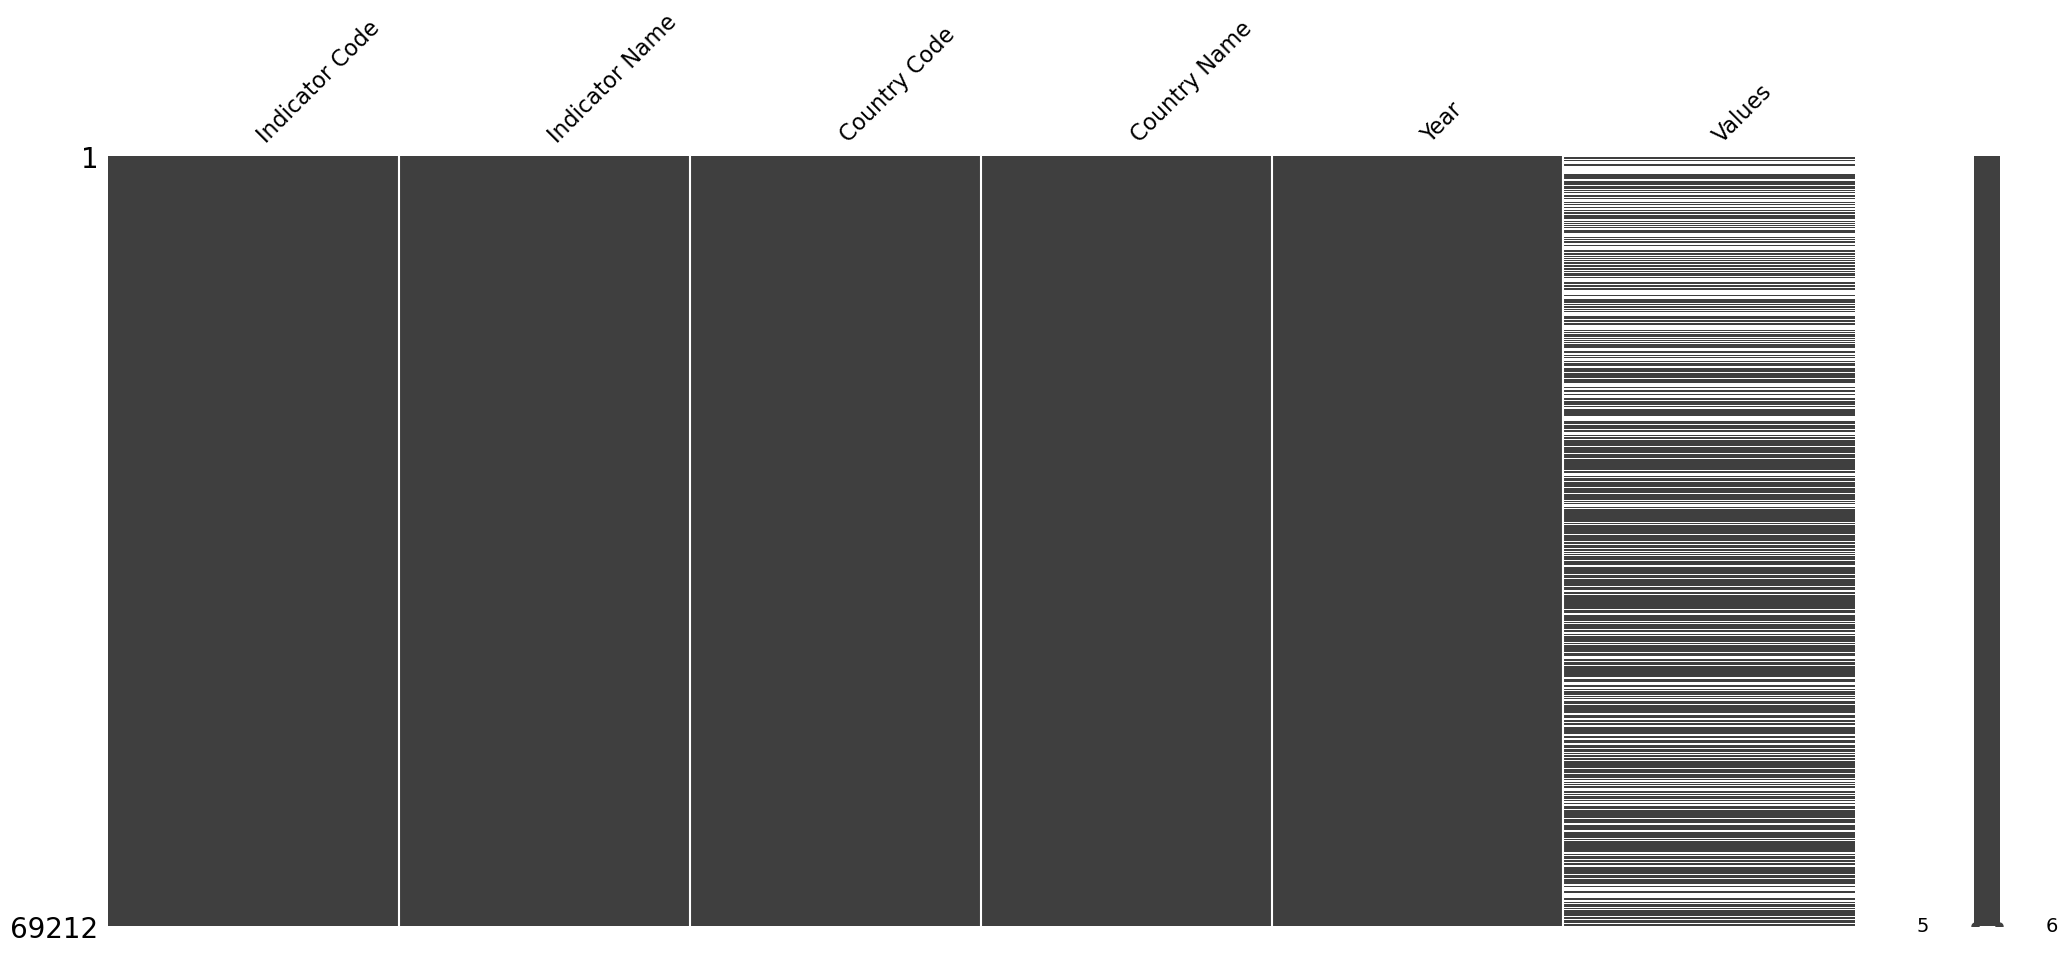

In [187]:
msno.matrix(df)

# Etape 3 : Créez un dataframe dans le but de mener une analyse

## Analysons notre dataframe sous le spectre des pays 

Premièrement, nous allons récupérer deux données intéressantes dans le dataframe country : la région et l'income group, qui permettront par la suite d'effectuer des analyses en fonction de ces paramètres.

In [190]:
df_temp = country_df.loc[:, ["Country Code", "Region", "Income Group"]]
df_temp

,Country Code,Region,Income Group
0,ABW,Latin America & Caribbean,High income: nonOECD
1,AFG,South Asia,Low income
2,AGO,Sub-Saharan Africa,Upper middle income
3,ALB,Europe & Central Asia,Upper middle income
4,AND,Europe & Central Asia,High income: nonOECD
...,...,...,...
236,XKX,Europe & Central Asia,Lower middle income
237,YEM,Middle East & North Africa,Lower middle income
238,ZAF,Sub-Saharan Africa,Upper middle income
239,ZMB,Sub-Saharan Africa,Lower middle income


Nous ne souhaitons conserver que les pays pour lesquels nous disposons de ces deux informations, aussi nous allons supprimer de notre dataframe "df_temp" les lignes qui n'ont pas de Region ou d'Income group

In [192]:
df_temp = df_temp.loc[(~df_temp["Region"].isnull()) & (~df_temp["Income Group"].isnull()), :]
df_temp

,Country Code,Region,Income Group
0,ABW,Latin America & Caribbean,High income: nonOECD
1,AFG,South Asia,Low income
2,AGO,Sub-Saharan Africa,Upper middle income
3,ALB,Europe & Central Asia,Upper middle income
4,AND,Europe & Central Asia,High income: nonOECD
...,...,...,...
236,XKX,Europe & Central Asia,Lower middle income
237,YEM,Middle East & North Africa,Lower middle income
238,ZAF,Sub-Saharan Africa,Upper middle income
239,ZMB,Sub-Saharan Africa,Lower middle income


Ensuite nous concaténons les deux dataframe dans un nouveau dataframe. Nous choisissons une jointure à droite afin de supprimer du dataframe final les pays qui n'ont pas de Region ou d'Income group renseigné (comme vu précédemment)

In [194]:
data = pd.merge(df, df_temp, on="Country Code", how="right")
data

,Indicator Code,Indicator Name,Country Code,Country Name,Year,Values,Region,Income Group
0,SE.COM.DURS,Duration of compulsory education (years),ABW,Aruba,1990,NaN,Latin America & Caribbean,High income: nonOECD
1,SE.SEC.PROG.ZS,"Effective transition rate from primary to lower secondary general education, both sexes (%)",ABW,Aruba,1990,NaN,Latin America & Caribbean,High income: nonOECD
2,NY.GNP.MKTP.PP.CD,"GNI, PPP (current international $)",ABW,Aruba,1990,NaN,Latin America & Caribbean,High income: nonOECD
3,SE.SEC.ENRR,"Gross enrolment ratio, secondary, both sexes (%)",ABW,Aruba,1990,NaN,Latin America & Caribbean,High income: nonOECD
4,SE.TER.ENRR,"Gross enrolment ratio, tertiary, both sexes (%)",ABW,Aruba,1990,NaN,Latin America & Caribbean,High income: nonOECD
...,...,...,...,...,...,...,...,...
61199,IT.CMP.PCMP.P2,Personal computers (per 100 people),ZWE,Zimbabwe,2015,NaN,Sub-Saharan Africa,Low income
61200,SP.POP.1524.TO.UN,"Population, ages 15-24, total",ZWE,Zimbabwe,2015,3333716.0,Sub-Saharan Africa,Low income
61201,SE.PRE.ENRL.TC.ZS,Pupil-teacher ratio in pre-primary education (headcount basis),ZWE,Zimbabwe,2015,NaN,Sub-Saharan Africa,Low income
61202,SE.SCH.LIFE,"School life expectancy, primary to tertiary, both sexes (years)",ZWE,Zimbabwe,2015,NaN,Sub-Saharan Africa,Low income


Nous cherchons ensuite à savoir si des pays ne présentent aucune données

In [295]:
country_values = data.groupby(["Country Code"], as_index=False).count().sort_values(by="Values", ascending=True)
country_values

,Country Code,Indicator Code,Indicator Name,Country Name,Year,Values,Region,Income Group
87,IMN,286,286,286,286,0,286,286
118,MAF,286,286,286,286,0,286,286
132,MNP,286,286,286,286,1,286,286
8,ASM,286,286,286,286,1,286,286
209,XKX,286,286,286,286,10,286,286
...,...,...,...,...,...,...,...,...
62,FIN,286,286,286,286,256,286,286
85,HUN,286,286,286,286,257,286,286
124,MEX,286,286,286,286,257,286,286
48,CYP,286,286,286,286,258,286,286


Nous constatons en effet que certains pays n'ont aucune valeur, et d'autres très peu (XKX par exemple).

Nous allons définir un seuil afin de supprimer les pays ne présentant pas suffisamment de données. 

Premièrement représentons la distribution des valeurs par pays.

<Axes: >

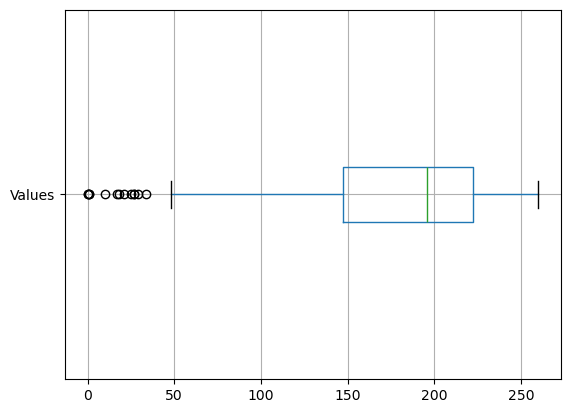

In [297]:
country_values.boxplot(column="Values", vert=False)

Supprimons les outliers, ici les pays qui ont un nombre de valeurs inférieurs à 50

In [306]:
liste_pays_a_suppr = country_values.loc[country_values["Values"] < 50, "Country Code"].tolist()
data = data.loc[~data["Country Code"].isin(liste_pays_a_suppr), :]
data

,Indicator Code,Indicator Name,Country Code,Country Name,Year,Values,Region,Income Group
0,SE.COM.DURS,Duration of compulsory education (years),ABW,Aruba,1990,NaN,Latin America & Caribbean,High income: nonOECD
1,SE.SEC.PROG.ZS,"Effective transition rate from primary to lower secondary general education, both sexes (%)",ABW,Aruba,1990,NaN,Latin America & Caribbean,High income: nonOECD
2,NY.GNP.MKTP.PP.CD,"GNI, PPP (current international $)",ABW,Aruba,1990,NaN,Latin America & Caribbean,High income: nonOECD
3,SE.SEC.ENRR,"Gross enrolment ratio, secondary, both sexes (%)",ABW,Aruba,1990,NaN,Latin America & Caribbean,High income: nonOECD
4,SE.TER.ENRR,"Gross enrolment ratio, tertiary, both sexes (%)",ABW,Aruba,1990,NaN,Latin America & Caribbean,High income: nonOECD
...,...,...,...,...,...,...,...,...
61199,IT.CMP.PCMP.P2,Personal computers (per 100 people),ZWE,Zimbabwe,2015,NaN,Sub-Saharan Africa,Low income
61200,SP.POP.1524.TO.UN,"Population, ages 15-24, total",ZWE,Zimbabwe,2015,3333716.0,Sub-Saharan Africa,Low income
61201,SE.PRE.ENRL.TC.ZS,Pupil-teacher ratio in pre-primary education (headcount basis),ZWE,Zimbabwe,2015,NaN,Sub-Saharan Africa,Low income
61202,SE.SCH.LIFE,"School life expectancy, primary to tertiary, both sexes (years)",ZWE,Zimbabwe,2015,NaN,Sub-Saharan Africa,Low income


## Passons en revue chaque indicateur

### Créons une fonction

Etant donné que nous allons effectuer le même travail sur nos 11 indicateurs, nous allons ici créer une fonction permettant d'afficher la répartition des valeurs année par année

In [ ]:
def affiche_donnees(dataframe, indicateur) :
    df = dataframe.pivot_table(index=["Indicator Code", "Indicator Name", "Country Code", "Country Name"], columns="Year", values="Values")
    df = df.reset_index()
    

### Premier indicateur

In [425]:
df2 = df.pivot_table(index=["Indicator Code", "Indicator Name", "Country Code", "Country Name"], columns="Year", values="Values")
df2 = df2.reset_index()
df2

Year,Indicator Code,Indicator Name,Country Code,Country Name,1990,1991,1992,1993,1994,1995,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,IT.CMP.PCMP.P2,Personal computers (per 100 people),ABW,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,...,9.917683e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IT.CMP.PCMP.P2,Personal computers (per 100 people),AFG,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,...,3.901483e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IT.CMP.PCMP.P2,Personal computers (per 100 people),AGO,Angola,NaN,NaN,NaN,NaN,NaN,NaN,...,6.460189e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IT.CMP.PCMP.P2,Personal computers (per 100 people),ALB,Albania,NaN,NaN,NaN,NaN,NaN,NaN,...,3.774092e+00,4.105840e+00,4.593538e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IT.CMP.PCMP.P2,Personal computers (per 100 people),ARB,Arab World,NaN,NaN,NaN,NaN,6.379000e-01,8.181984e-01,...,6.676681e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2329,SP.POP.1524.TO.UN,"Population, ages 15-24, total",LIE,Liechtenstein,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2330,SP.POP.1524.TO.UN,"Population, ages 15-24, total",PLW,Palau,NaN,NaN,NaN,NaN,NaN,NaN,...,2.825000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2331,SP.POP.1524.TO.UN,"Population, ages 15-24, total",PRK,"Korea, Dem. People’s Rep.",4398200.0,4318345.0,4174234.0,3992197.0,3.809672e+06,3.654871e+06,...,3.764977e+06,3.808688e+06,3.842348e+06,3874323.0,3909917.0,3951002.0,3992828.0,4026364.0,4039319.0,4023348.0
2332,SP.POP.1524.TO.UN,"Population, ages 15-24, total",SLE,Sierra Leone,757081.0,760004.0,758398.0,754604.0,7.519160e+05,7.529090e+05,...,1.090894e+06,1.115768e+06,1.135785e+06,1155101.0,1176820.0,1201503.0,1228339.0,1257448.0,1288673.0,1321852.0


<Axes: xlabel='Year'>

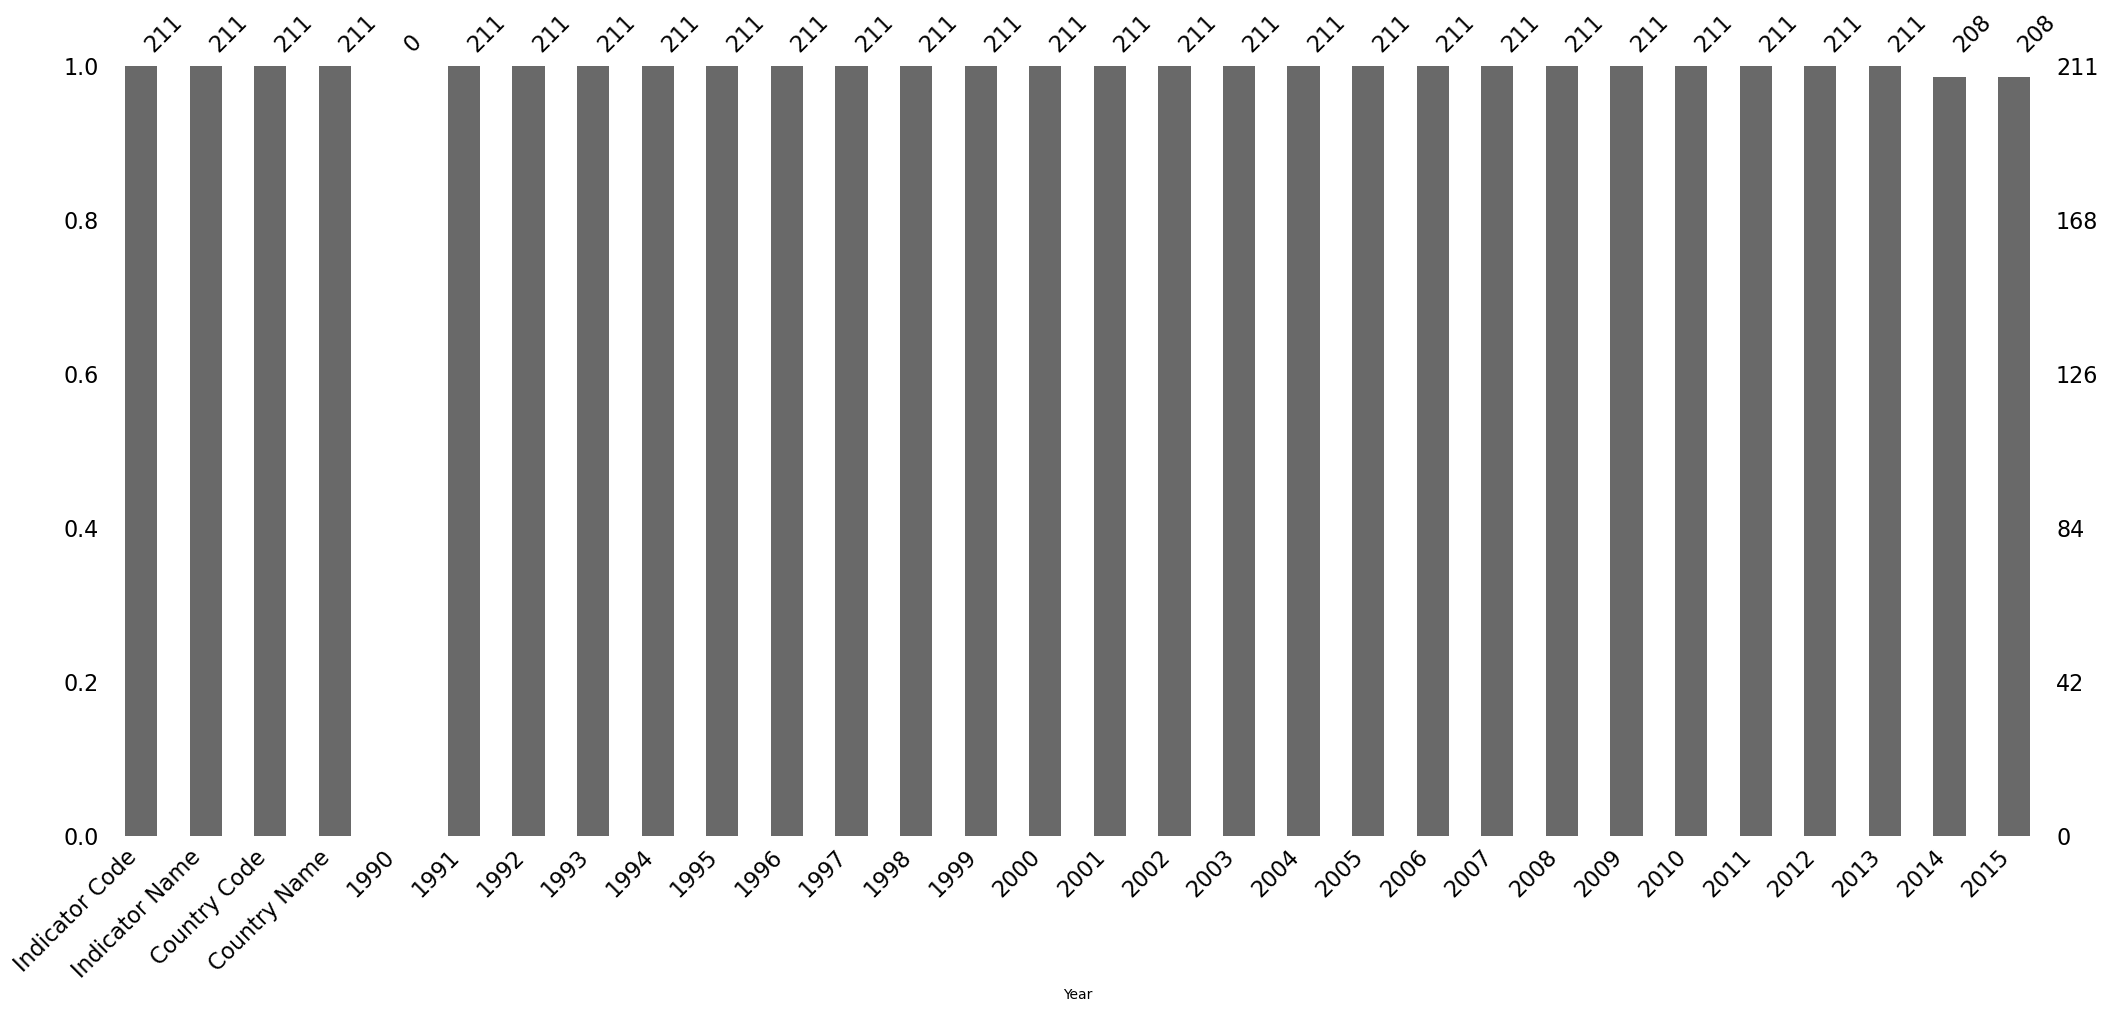

In [449]:
msno.bar(df2.loc[df2["Indicator Code"] == indicateurs[10], :])

In [272]:
data = df.pivot_table(index="Country Name", columns=["Indicator Name", "Year"], values="Values", aggfunc="sum")
data.reset_index()

Indicator Name        Country Name Duration of compulsory education (years)  \
Year                                                                   1990   
0                      Afghanistan                                      0.0   
1                          Albania                                      0.0   
2                          Algeria                                      0.0   
3                   American Samoa                                      0.0   
4                          Andorra                                      0.0   
..                             ...                                      ...   
237             West Bank and Gaza                                      0.0   
238                          World                                      0.0   
239                    Yemen, Rep.                                      0.0   
240                         Zambia                                      0.0   
241                       Zimbabwe                                      0.0   

Indicator Name                                           ...  \
Year           1991 1992 1993 1994 1995 1996 1997  1998  ...   
0               0.0  0.0  0.0  0.0  0.0  0.0  0.0   6.0  ...   
1               0.0  0.0  0.0  0.0  0.0  0.0  0.0   8.0  ...   
2               0.0  0.0  0.0  0.0  0.0  0.0  0.0  10.0  ...   
3               0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...   
4               0.0  0.0  0.0  0.0  0.0  0.0  0.0  10.0  ...   
..              ...  ...  ...  ...  ...  ...  ...   ...  ...   
237             0.0  0.0  0.0  0.0  0.0  0.0  0.0  10.0  ...   
238             0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...   
239             0.0  0.0  0.0  0.0  0.0  0.0  0.0   9.0  ...   
240             0.0  0.0  0.0  0.0  0.0  0.0  0.0   7.0  ...   
241             0.0  0.0  0.0  0.0  0.0  0.0  0.0   7.0  ...   

Indicator Name Unemployment, total (% of total labor force)             \
Year                                                   2006       2007   
0                                                  8.400000   8.300000   
1                                                 13.000000  13.500000   
2                                                 12.300000  13.800000   
3                                                  0.000000   0.000000   
4                                                  0.000000   0.000000   
..                                                      ...        ...   
237                                               23.600000  23.799999   
238                                                5.927961   5.541535   
239                                               15.700000  15.400000   
240                                               14.300000  12.100000   
241                                                5.600000   5.500000   

Indicator Name                                                         \
Year                 2008       2009       2010       2011       2012   
0                8.200000   8.200000   8.100000   8.200000   8.000000   
1               13.000000  13.800000  14.200000  14.000000  13.400000   
2               11.300000  10.200000  10.000000  10.000000  11.000000   
3                0.000000   0.000000   0.000000   0.000000   0.000000   
4                0.000000   0.000000   0.000000   0.000000   0.000000   
..                    ...        ...        ...        ...        ...   
237             24.000000  24.600000  23.700001  20.900000  23.000000   
238              5.667586   6.210754   6.081802   6.028744   5.970743   
239             15.000000  14.600000  17.799999  17.299999  17.600000   
240              7.900000   8.600000  10.800000  13.600000   7.800000   
241              5.400000   5.500000   6.200000   5.400000   5.300000   

Indicator Name                                  
Year                2013       2014       2015  
0                8.40000   8.600000   8.600000  
1               15.60000  17.500000  17.100000  
2                9.80000  10.6

# Etape 4 : Analysez le jeu de données